#### Import Statements

In [2]:
%matplotlib inline
%env IONQ_API_KEY= UHwrJdgGZCyf2U6DB8SE24YBFTB0dpep 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
import qiskit
import qiskit.providers.aer.noise as noise

import collections
import pennylane as qml

import pennylane as qml
import torch
from torch.autograd.functional import hessian, jacobian
import pennylane_ionq as ionq
from pennylane_ionq import ops # not used right now, but for future
from pennylane import numpy as np # autograd compatible numpy
from pennylane.numpy import pi 
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
%precision %0.4f   
#control display precision

if True:    #for collapsing following block in Spyder or any editor
    import seaborn as sns
    
    sns.set_color_codes("deep"); sns.set_context("paper"); sns.set_style("ticks")
    STYLE_DICT = dict.fromkeys(['axes.labelsize', 'xtick.labelsize', 'ytick.labelsize', 'axes.titlesize'], 'medium')
    STYLE_DICT.update({'font.size': 18, 'figure.dpi':150, 'image.cmap': 'plasma'})
    STYLE_DICT.update(dict.fromkeys(['ytick.direction', 'xtick.direction'], 'in'))
    STYLE_DICT.update(dict.fromkeys(['xtick.major.width', 'ytick.major.width', 'axes.linewidth'], .5))
    plt.rcParams.update(STYLE_DICT)

env: IONQ_API_KEY=UHwrJdgGZCyf2U6DB8SE24YBFTB0dpep


#### Required Inputs

In [4]:
num_wires = 3
num_layers = 4

'''***CHOOSE QC OR SIM***'''

#When running on simulator
backend_choice = "ionq.simulator" #change to what backend (classical or real computer)
noise_model = "aria-1"

#When running on QC
backend_provider = "ionq.qpu"
target_computer = "qpu.aria-1"

#Devices
#devExact = qml.device(backend_provider, wires=num_wires, target=target_computer, shots=1000)
devExact = ionq.SimulatorDevice(target="simulator.aria-1", wires=num_wires, shots=1000)
#devParametrized = qml.device(backend_provider, wires=num_wires, target=target_computer, shots=1000)
devParametrized = ionq.SimulatorDevice(target="simulator.aria-1", wires=num_wires, shots=1000)

'''*********************'''

#optimized thetas for circuit
IPG_array = np.pi*np.array([-9.9974e-04,  5.0015e-01, -8.7572e-01,  4.6509e-01, -2.0464e-04,
        -2.1504e-01, -1.3193e-01, -7.6665e-06,  6.9494e-03, -6.2607e-01,
        -6.8583e-05,  1.2613e-01, -9.9475e-02, -2.7709e-05, -6.5036e-01,
        -2.2109e-04, -5.0011e-01, -8.3623e-05,  1.1290e-01, -7.8818e-05,
        -4.8794e-01,  5.0015e-01, -5.0006e-01, -2.4978e-01,  4.2339e-04,
        -2.5013e-01, -3.2121e-04,  7.9203e-06,  5.0007e-01, -4.9993e-01,
         6.2106e-01, -2.5722e-04, -1.2093e-01,  5.0014e-01, -5.0036e-01,
         5.0020e-01])

#### Helper Functions

#### Circuits

- Check if Ideal Function from Pennylane Works

In [5]:
devExact = qml.device("default.qubit", wires=num_wires)
@qml.qnode(devExact)
def exactCircuit(value):
    selectBasis(value)
    qml.QFT(wires=range(num_wires))
    #return qml.probs(wires=[0,1,2])
    return qml.state()
exactCircuit(0)

NameError: name 'selectBasis' is not defined

- parametrized circuit below

In [5]:
devParametrized = qml.device("default.qubit", wires=num_wires)
@qml.qnode(devParametrized)
def paramCircuit(parameters, value):
    selectBasis(value)
    qml.StronglyEntanglingLayers(weights=parameters, wires=range(num_wires))
    #return qml.probs(wires=[0,1,2])
    return qml.state()
paramCircuit(IPG_array.reshape(param_shape), 0)

tensor([0.34712384-0.06897698j, 0.3468389 -0.06820254j,
        0.34655123-0.06943702j, 0.34703545-0.06840325j,
        0.3468034 -0.06884056j, 0.34643296-0.06765459j,
        0.34676839-0.06932124j, 0.34698466-0.06862859j], requires_grad=True)

#### Plotting
- comment out if doing QPU runs

In [7]:
# ******** COMMENT OUT IF DOING QPU RUNS ******** * 

exact_state = exactCircuit(0)
exact_real = np.copy(exact_state.real)
exact_imag = np.copy(exact_state.imag)

IPG_param_state = paramCircuit(IPG_array.reshape(param_shape), 0)
IPG_param_state_real = np.copy(IPG_param_state.real)
IPG_param_state_imag = np.copy(IPG_param_state.imag)


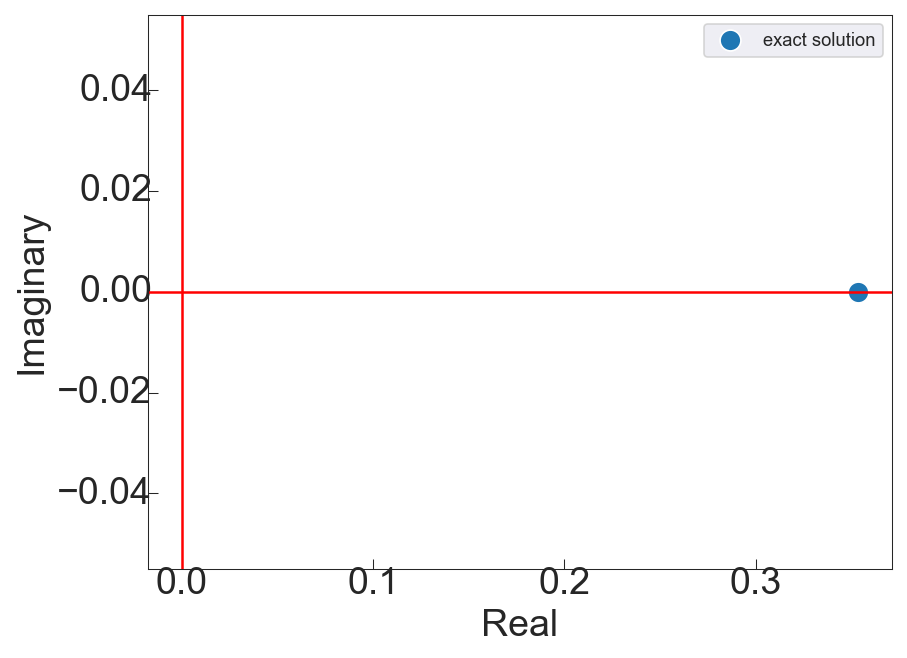

In [8]:
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.yticks(va='center')
plt.xticks(va='center')
plt.tick_params(axis='y', pad=-2)
plt.tick_params(axis='x', pad=7)
sns.set_style("darkgrid")
sns.scatterplot(x=exact_real, y=exact_imag, s=100, label='exact solution')
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.show()

Imaginary [-0.24999997 -0.32664071 -0.24999993 -0.32664073 -0.24999995 -0.32664071
 -0.24999994 -0.32664071]
Real [0.25000004 0.1352991  0.25000005 0.13529907 0.25000005 0.13529912
 0.25000007 0.13529908]


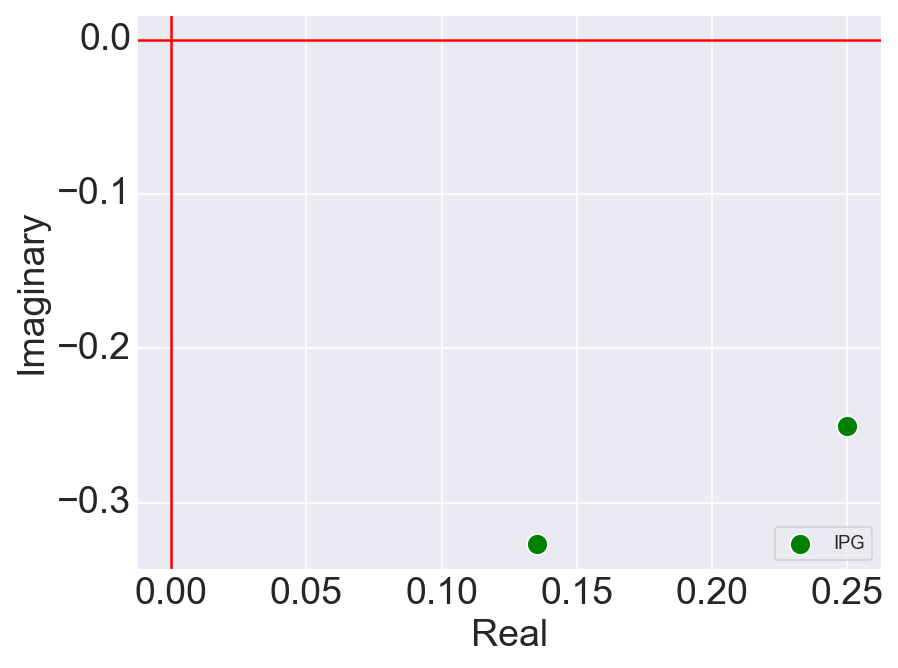

In [14]:
print("Imaginary", IPG_param_state_imag)
print("Real", IPG_param_state_real)
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.yticks(va='center')
plt.xticks(va='center')
plt.tick_params(axis='y', pad=-2)
plt.tick_params(axis='x', pad=7)
sns.set_style("darkgrid")
sns.scatterplot(x=IPG_param_state_real, y=IPG_param_state_imag, s=100, color='green', label='IPG')
plt.axhline(0, color='red')
plt.axvline(0, color='red')

In [9]:
get_global_phase(IPG_param_state, exact_state)

0.19551572622214267 real
0.19550825385231277 imag
thetas for real and imaginary part differ by:  7.472369829897296e-06  radians
Global Phase: 


0.19551572622214267

#### Running on actual comp or comp sim

- running parametrized circuit on 

Basis [1,0,0] Counter({6: 0.147, 3: 0.145, 1: 0.142, 0: 0.13, 5: 0.123, 4: 0.121, 2: 0.119, 7: 0.073})


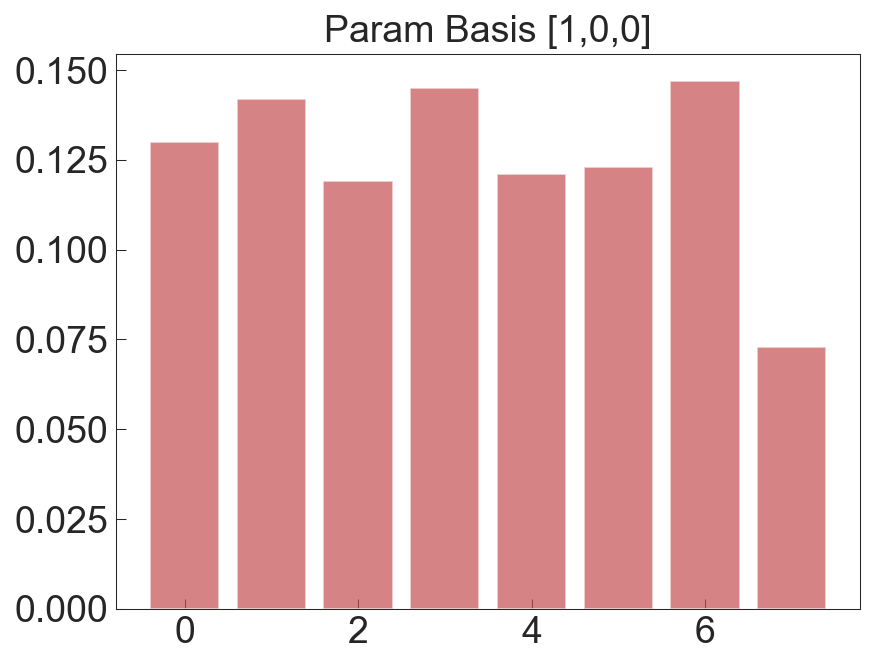

[0, 0, 1]
Param Basis [0,1,0] Counter({6: 0.159, 3: 0.147, 2: 0.137, 1: 0.133, 5: 0.119, 0: 0.112, 4: 0.101, 7: 0.092})


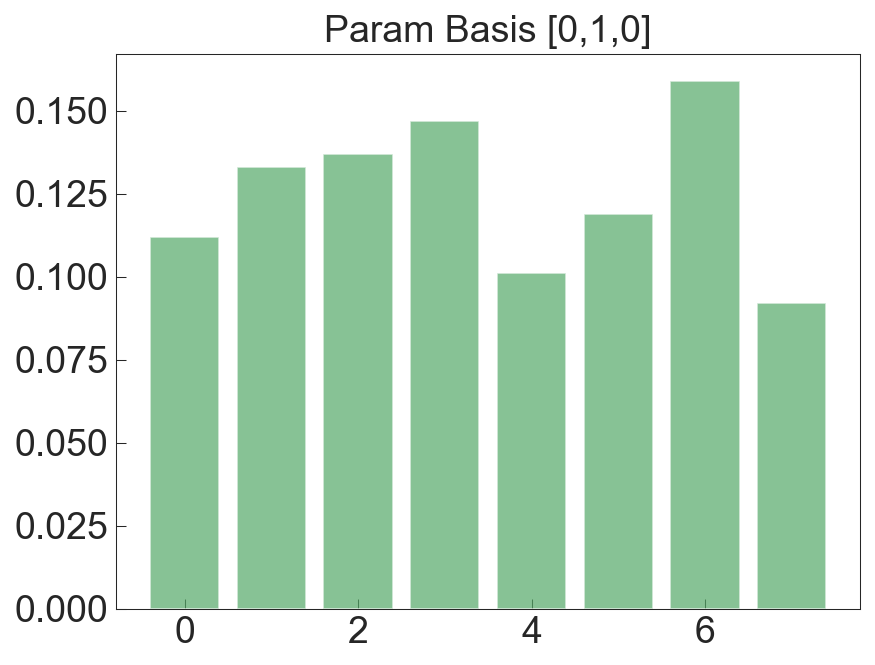

[0, 1, 0]
Basis [0,0,1] Counter({6: 0.162, 3: 0.148, 1: 0.128, 2: 0.128, 0: 0.123, 5: 0.115, 4: 0.105, 7: 0.091})


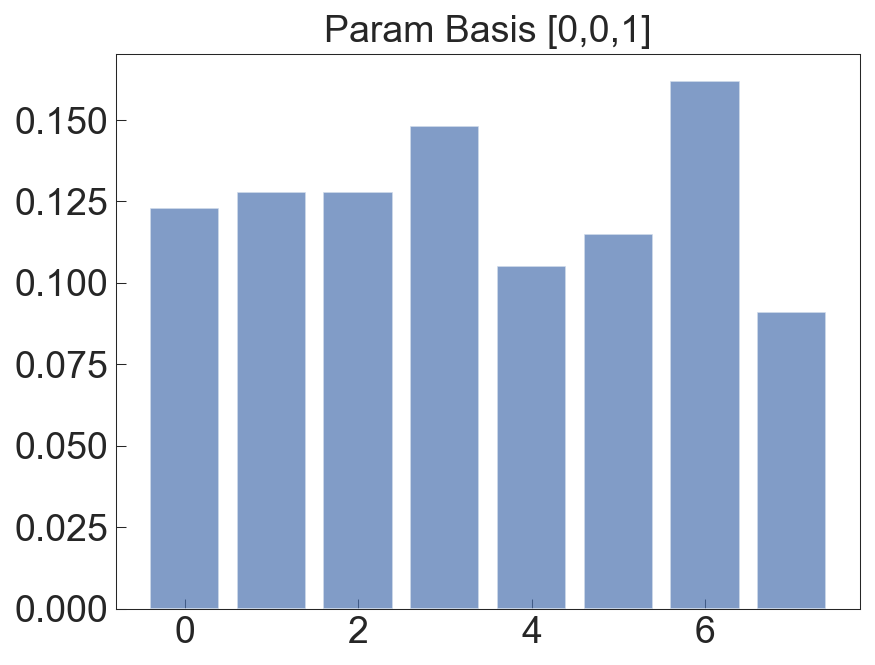

In [10]:
resultsParamBasis0 = collections.Counter(dict(enumerate(paramCircuit(IPG_array.reshape(param_shape), 0))))
print("Basis [1,0,0]", resultsParamBasis0)
keys0 = list(resultsParamBasis0.keys())
values0 = [value.item() for value in resultsParamBasis0.values()]
plt.title("Param Basis [1,0,0]")
plt.bar(keys0, values0, align='center', alpha=0.7, color='r')
plt.show()

resultsParamBasis1 = collections.Counter(dict(enumerate(paramCircuit(IPG_array.reshape(param_shape), 1))))
print("Param Basis [0,1,0]", resultsParamBasis1)
keys1 = list(resultsParamBasis1.keys())
values1 = [value.item() for value in resultsParamBasis1.values()]
plt.title("Param Basis [0,1,0]")
plt.bar(keys1, values1, align='center', alpha=0.7, color='g')
plt.show()

resultsParamBasis2 = collections.Counter(dict(enumerate(paramCircuit(IPG_array.reshape(param_shape), 2))))
print("Basis [0,0,1]", resultsParamBasis2)
keys2 = list(resultsParamBasis2.keys())
values2 = [value.item() for value in resultsParamBasis2.values()]
plt.title("Param Basis [0,0,1]")
plt.bar(keys2, values2, align='center', alpha=0.7, color='b')
plt.show()

Basis [1,0,0] Counter({4: tensor(0.155, requires_grad=True), 1: tensor(0.148, requires_grad=True), 0: tensor(0.129, requires_grad=True), 2: tensor(0.128, requires_grad=True), 5: tensor(0.127, requires_grad=True), 3: tensor(0.117, requires_grad=True), 6: tensor(0.105, requires_grad=True), 7: tensor(0.091, requires_grad=True)})


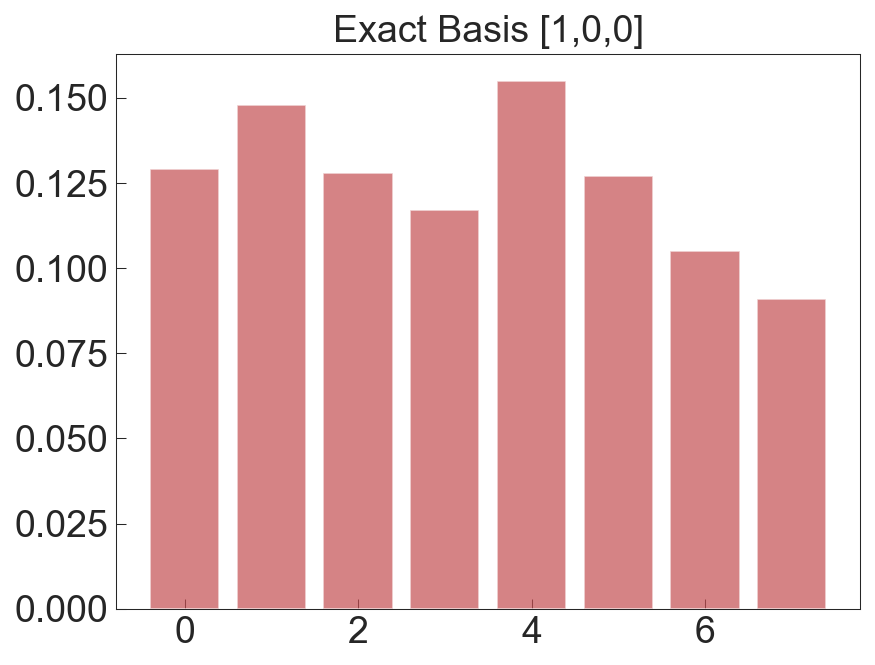

[0, 0, 1]
Basis [0,1,0] Counter({4: tensor(0.148, requires_grad=True), 1: tensor(0.136, requires_grad=True), 2: tensor(0.134, requires_grad=True), 3: tensor(0.134, requires_grad=True), 5: tensor(0.134, requires_grad=True), 6: tensor(0.115, requires_grad=True), 0: tensor(0.112, requires_grad=True), 7: tensor(0.087, requires_grad=True)})


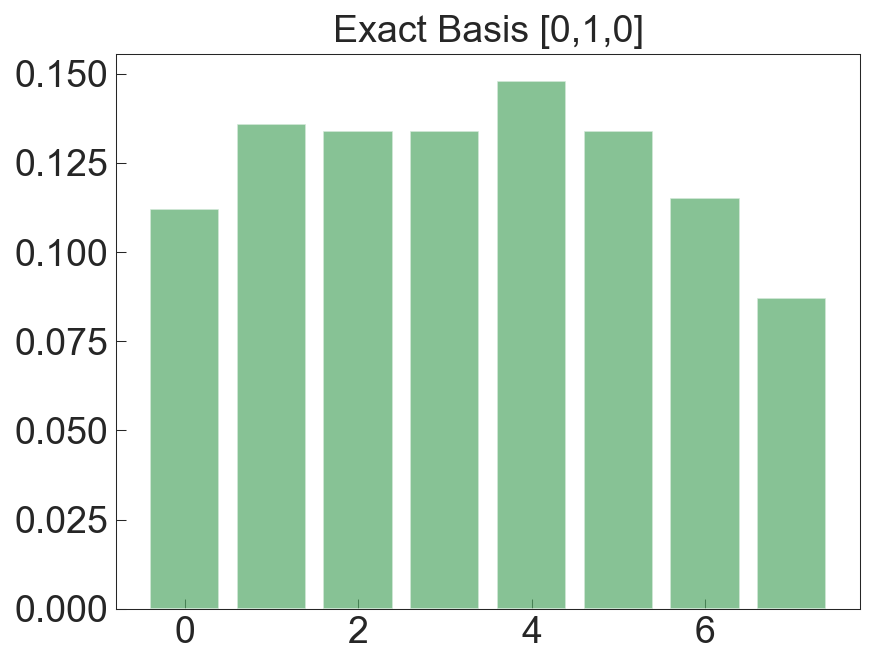

[0, 1, 0]
Basis [0,0,1] Counter({1: tensor(0.159, requires_grad=True), 4: tensor(0.133, requires_grad=True), 3: tensor(0.131, requires_grad=True), 6: tensor(0.126, requires_grad=True), 0: tensor(0.125, requires_grad=True), 5: tensor(0.125, requires_grad=True), 2: tensor(0.101, requires_grad=True), 7: tensor(0.1, requires_grad=True)})


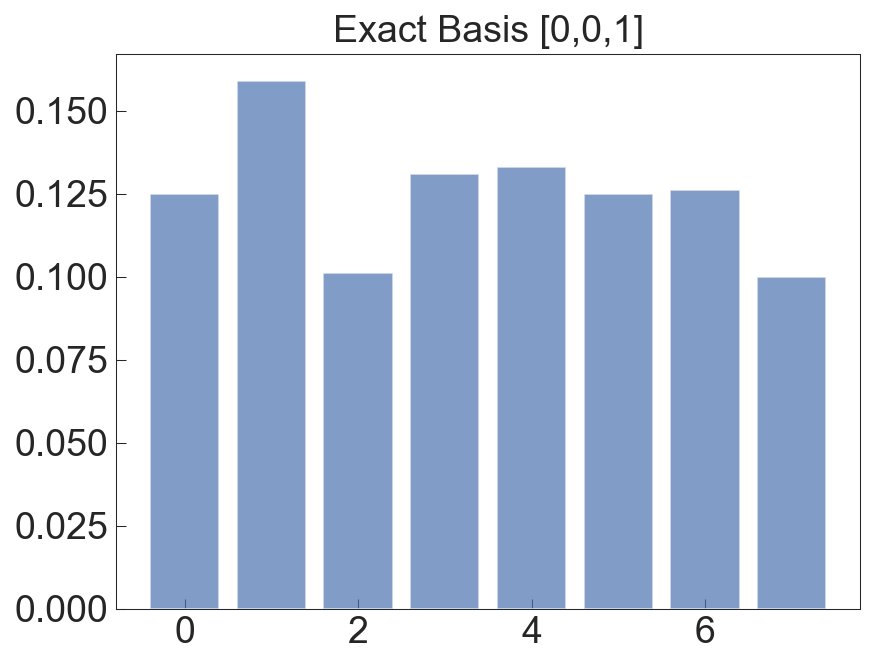

In [11]:
resultsParamBasis0_Exact = collections.Counter(dict(enumerate(exactCircuit(0))))
print("Basis [1,0,0]", resultsParamBasis0_Exact)
keys0_Exact = list(resultsParamBasis0_Exact.keys())
values0_Exact = [value.item() for value in resultsParamBasis0_Exact.values()]
plt.title("Exact Basis [1,0,0]")
plt.bar(keys0_Exact, values0_Exact, align='center', alpha=0.7, color='r')
plt.show()

resultsParamBasis1_Exact = collections.Counter(dict(enumerate(exactCircuit(1))))
print("Basis [0,1,0]", resultsParamBasis1_Exact)
keys1_Exact = list(resultsParamBasis1_Exact.keys())
values1_Exact = [value.item() for value in resultsParamBasis1_Exact.values()]
plt.title("Exact Basis [0,1,0]")
plt.bar(keys1_Exact, values1_Exact, align='center', alpha=0.7, color='g')
plt.show()

resultsParamBasis2_Exact = collections.Counter(dict(enumerate(exactCircuit(2))))
print("Basis [0,0,1]", resultsParamBasis2_Exact)
keys2_Exact = list(resultsParamBasis2_Exact.keys())
values2_Exact = [value.item() for value in resultsParamBasis2_Exact.values()]
plt.title("Exact Basis [0,0,1]")
plt.bar(keys2_Exact, values2_Exact, align='center', alpha=0.7, color='b')
plt.show()